# 1. Business understanding
This weight category classification project's main goal is to develop a predictive model to identify the weight group an individual belongs to based on their lifestyle choices.  
 
This information can be used to develop targeted interventions and prevention strategies to address factors contributing to weight gain.

**Objectives**

Predict Weight Categories:
Develop machine learning models to predict an individual's weight category based on lifestyle choices.

Identify Key Predictors:
Determine the most influential factors contributing to obesity across different weight categories.

Understand Gender Differences:
Visualize how obesity risk factors differ between men and women.

Improve Risk Assessment:
Build a predictive model to predict obesity based on if a family member has suffered or suffers from overweight.
Associate rule mining to find the most common patterns in the data.


# 2. Data Understanding

The dataset includes data for the estimation of obesity levels in individuals from Mexico, Peru, and Colombia, based on their eating habits and physical condition. It contains 16 features, 1 target and 2111 data samples. It is important to note that 23% of the data was collected directly from individuals, while the remaining 77% was generated synthetically.

The dataset is obtained from:  
[https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

### Features and Survey Questions

- **Gender**: What is your gender? (Female, Male)  
- **Age**: What is your age? (Numeric value)  
- **Height**: What is your height? (Numeric value in meters)  
- **Weight**: What is your weight? (Numeric value in kilograms)  
- **FHWO**: Has a family member suffered or suffers from overweight? (Yes, No)  
- **FAVC**: Do you eat high caloric food frequently? (Yes, No)  
- **FCVC**: Do you usually eat vegetables in your meals? (1-3) (Never, Sometimes, Always)  
- **NCP**: How many main meals do you have daily? (1-3) (Between 1-2, Three, More than three)  
- **CAEC**: Do you eat any food between meals? (0-3) (No, Sometimes, Frequently, Always)  
- **SMOKE**: Do you smoke? (Yes, No)  
- **CH2O**: How much water do you drink daily? (1-3) (Less than a liter, Between 1 and 2 L, More than 2 L)  
- **SCC**: Do you monitor the calories you eat daily? (Yes, No)  
- **FAF**: How often do you have physical activity? (0-3) (I do not have, 1 or 2 days, 2 or 4 days, 4 or 5 days)  
- **TUE**: How much time do you use technological devices such as cell phone, videogames, television, computer, and others? (0-2) (0–2 hours, 3–5 hours, More than 5 hours)  
- **CALC**: How often do you drink alcohol? (0-3) (I do not drink, Sometimes, Frequently, Always)  
- **MTRANS**: Which transportation do you usually use? (Automobile, Motorbike, Bike, Public Transportation, Walking)  
- **NObeyesdad**: Categorical and the **target** variable with values ranging from 0 to 6, representing different obesity levels:

  - **0**: Insufficient Weight (< 18.5 BMI)  
  - **1**: Normal Weight (18.5 - 24.9 BMI)  
  - **2**: Overweight Level I (25.0 - 29.9 BMI)  
  - **3**: Overweight Level II (30.0 - 34.9 BMI)  
  - **4**: Obesity Type I (35.0 - 39.9 BMI)  
  - **5**: Obesity Type II (40.0 - 44.9 BMI)  
  - **6**: Obesity Type III (≥ 45.0 BMI)  

The data contains no outliers or missing values.


# 3. Data Preparation
Categorical and binary columns are transformed into numerical values to enable the use of machine learning models. The following encoding methods are applied:

- **Binary variables** (e.g., `Gender`, `SMOKE`) are encoded using **Label Encoding**, mapping categories as follows:
  - `Gender`: Male → 1, Female → 0
  - `SMOKE`: No → 0, Yes → 1

- **Categorical variables** with multiple categories (e.g., `MTRANS`) are encoded using **Ordinal Encoding**, preserving their natural order.

After encoding all categorical data, the encoded values are converted to integers to enhance model efficiency.

In [593]:
import pandas as pd
df = pd.read_csv('datasets/ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [594]:
df['Gender'] = df['Gender'].replace({'Female': '0', 'Male': '1'})
df.rename(columns={'family_history_with_overweight': 'FHWO'}, inplace=True)
df['FHWO'] = df['FHWO'].replace({'no': '0', 'yes': '1'})
df['FAVC'] = df['FAVC'].replace({'no': '0', 'yes': '1'})
df['SMOKE'] = df['SMOKE'].replace({'no': '0', 'yes': '1'})
df['SCC'] = df['SCC'].replace({'no': '0', 'yes': '1'})
df['CALC'] = df['CALC'].replace({'no': '0', 'Sometimes': '1', 'Frequently': '2', 'Always': '3'})
df['MTRANS'] = df['MTRANS'].replace({'Walking': '0', 'Bike': '1', 'Motorbike': '2', 'Public_Transportation': '3', 'Automobile': '4'})
df['CAEC'] = df['CAEC'].replace({'no': '0', 'Sometimes': '1', 'Frequently': '2', 'Always': '3'})
df['NObeyesdad'] = df['NObeyesdad'].replace({'Insufficient_Weight': '0', 'Normal_Weight': '1', 'Overweight_Level_I': '2', 'Overweight_Level_II': '3', 'Obesity_Type_I': '4', 'Obesity_Type_II': '5', 'Obesity_Type_III': '6'})

df['Gender'] = df['Gender'].astype(int)
df['FHWO'] = df['FHWO'].astype(int)
df['FAVC'] = df['FAVC'].astype(int)
df['SMOKE'] = df['SMOKE'].astype(int)
df['SCC'] = df['SCC'].astype(int)
df['CALC'] = df['CALC'].astype(int)
df['MTRANS'] = df['MTRANS'].astype(int)
df['CAEC'] = df['CAEC'].astype(int)
df['NObeyesdad'] = df['NObeyesdad'].astype(int)
df.describe(include='all')

,Gender,Age,Height,Weight,FHWO,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,3.125059,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.676969,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,3.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


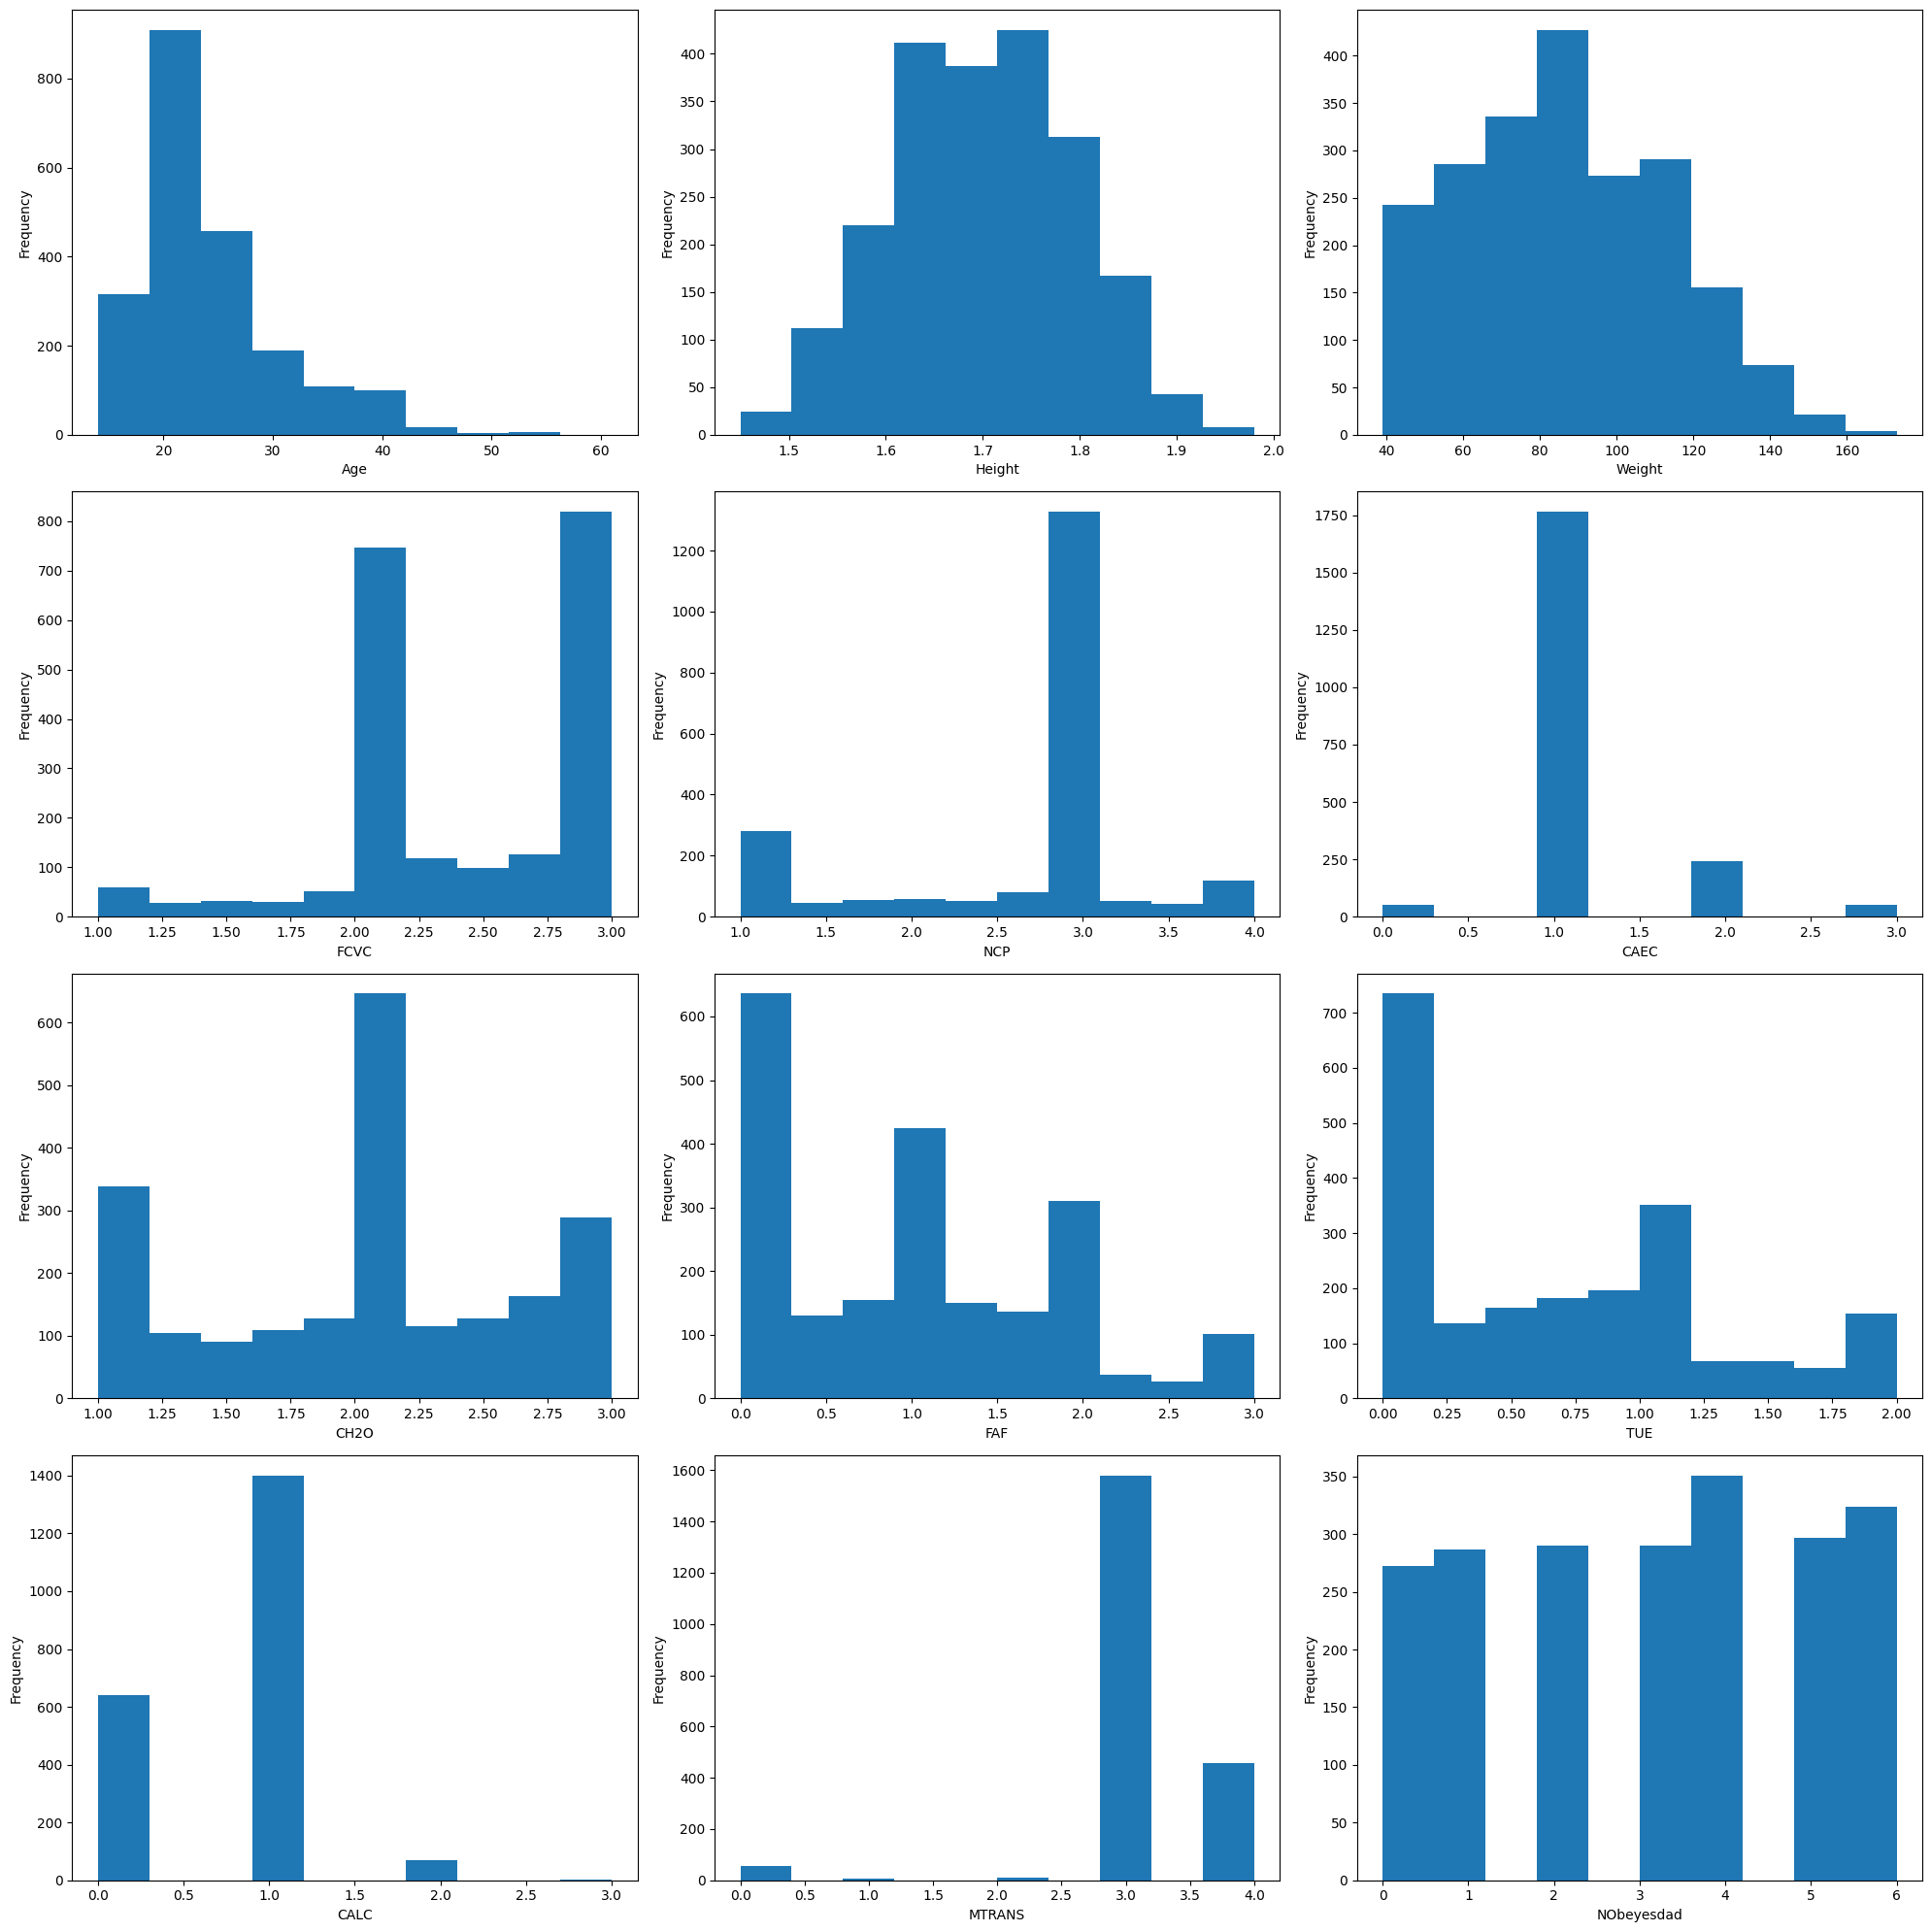

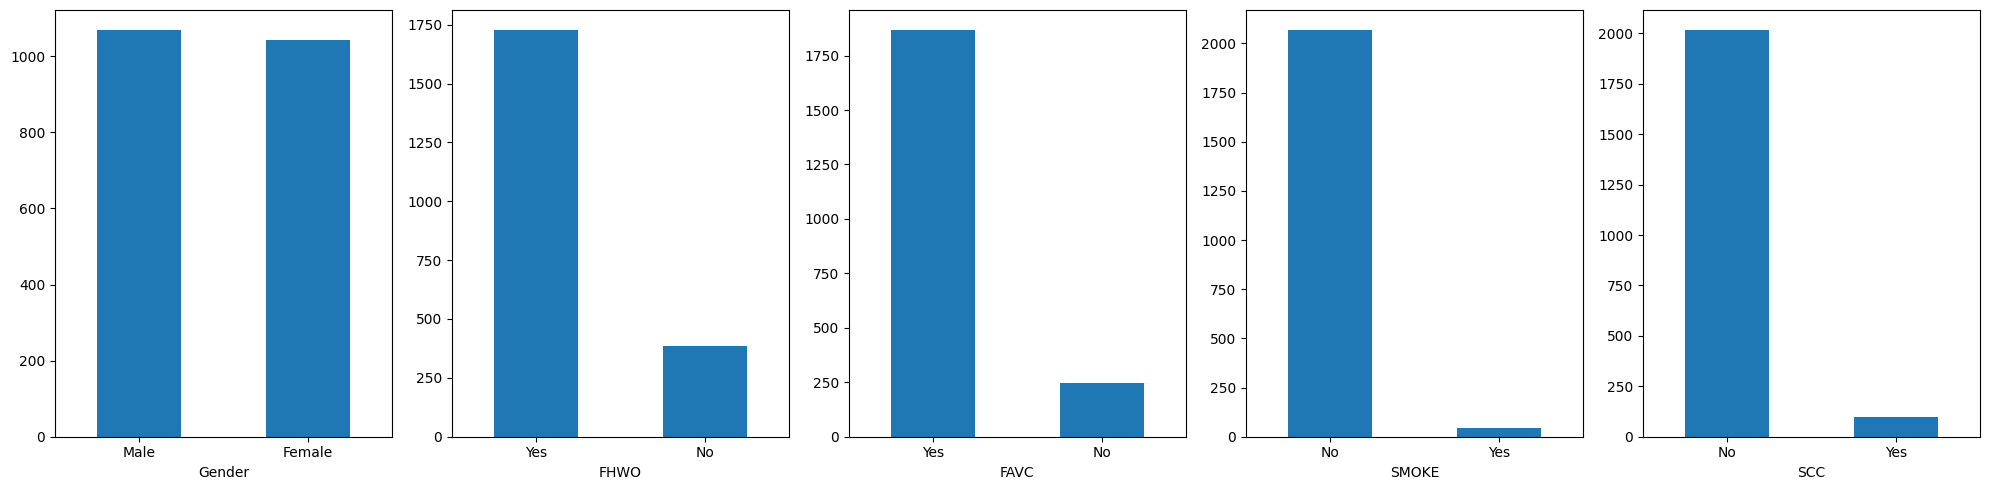

In [595]:
import matplotlib.pyplot as plt

# Non-binary columns
nonbinary_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']

# Plotting non-binary columns
plt.figure(figsize=(20, 20))
for i, col in enumerate(nonbinary_cols):
    plt.subplot(4, 3, i + 1)
    df[col].plot(kind='hist')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# Binary columns
binary_cols = ['Gender', 'FHWO', 'FAVC', 'SMOKE', 'SCC']
# Convert numerical labels back to categorical for visualization
binary_labels = {
    'Gender': {0: 'Female', 1: 'Male'},
    'FHWO': {0: 'No', 1: 'Yes'},
    'FAVC': {0: 'No', 1: 'Yes'},
    'SMOKE': {0: 'No', 1: 'Yes'},
    'SCC': {0: 'No', 1: 'Yes'}
}

plt.figure(figsize=(20, 5))
for i, col in enumerate(binary_cols):
    plt.subplot(1, 5, i + 1)
    
    value_counts = df[col].replace(binary_labels[col]).value_counts()
    
    value_counts.plot(kind='bar')
    plt.xlabel(col)
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 4. Modeling
The decision tree classifier and random forest classifier were used to predict which obesity group the individual belongs to. Logistic regression was used to predict the probability of a family member having suffered or suffering from overweight.

For predicting obesity groups, only the features related to eating habits were used. Weight and height were excluded as they are directly related to the target variable.

Both the decision tree and random forest were validated using split validation, while logistic regression was validated using cross-validation.

### Parameters used for the models:
- Decision Tree Classifier: max_depth=10
- Random Forest Classifier: n_estimators=100, max_samples=0.7, max_features=0.75 (bootstrap=True by default)
- Logistic Regression: default parameters

### Performance of the models:
The models' performances were evaluated using accuracy, precision, and recall scores. For logistic regression, the confusion matrix was also visualized.

- Decision Tree Classifier: Accuracy: 0.718, Precision: 0.732, Recall: 0.718
- Random Forest Classifier: Accuracy: 0.812, Precision 0.815: , Recall: 0.812
- Logistic Regression: Accuracy: 0.815, Precision: 0.832, Recall: 0.970
- Association rule mining the highest support: 0.86, confidence: 0.97


## 4.1 Decision Tree Classifier

In [596]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt

# Define features and target
X = df.drop(['NObeyesdad', 'Weight', 'Height'], axis=1)
y = df['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.3}")
print(f"Recall: {recall:.3f}")
print(f"Precision: {precision:.3f}")


Accuracy: 0.718
Recall: 0.718
Precision: 0.732


### Visualization of the Decision Tree

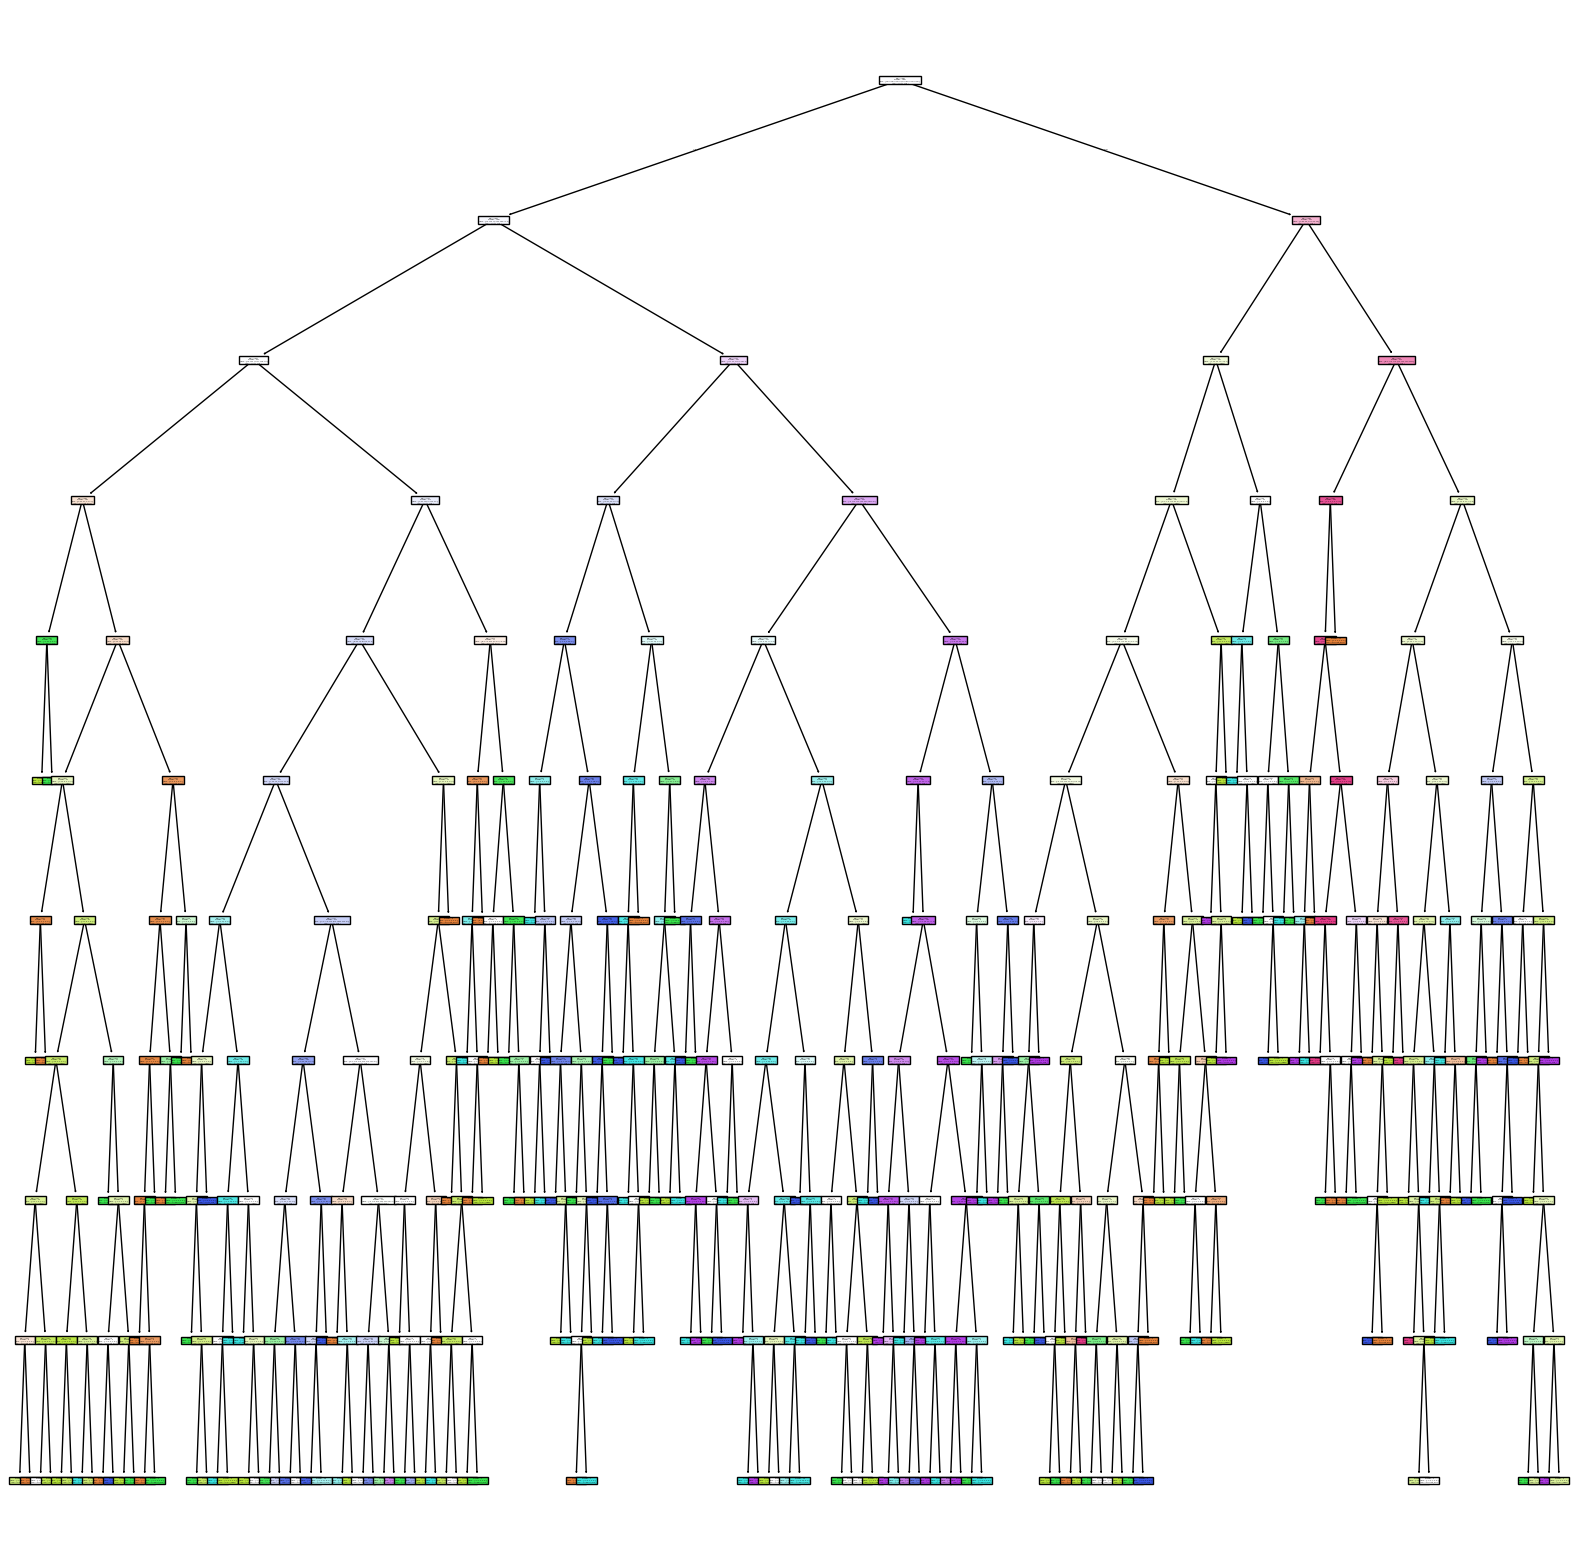

In [597]:
plt.figure(figsize=(20,20))
plot_tree(clf, feature_names=X.columns, class_names=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'], filled=True)
plt.show()

## 4.2 Random Forest Classifier and Comparison with Decision Tree

In [598]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_samples=0.7, max_features=0.75, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf, average='weighted')
precision = precision_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest Accuracy:, {accuracy:.3f}")
print(f"Random Forest Recall:, {recall:.3f}")
print(f"Random Forest Precision, {precision:.3f}")

Random Forest Accuracy:, 0.812
Random Forest Recall:, 0.812
Random Forest Precision, 0.815


<Figure size 1000x600 with 0 Axes>

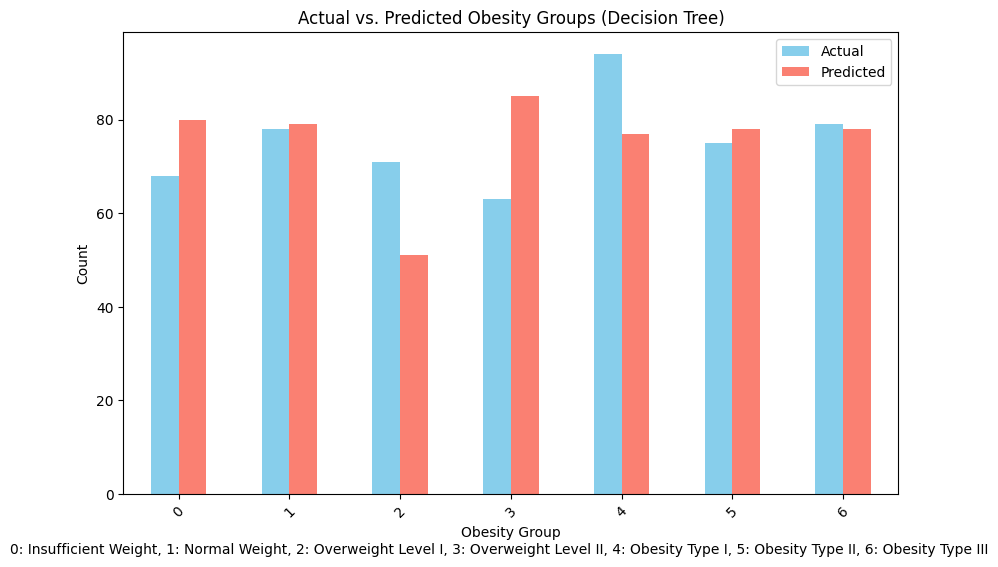

<Figure size 1000x600 with 0 Axes>

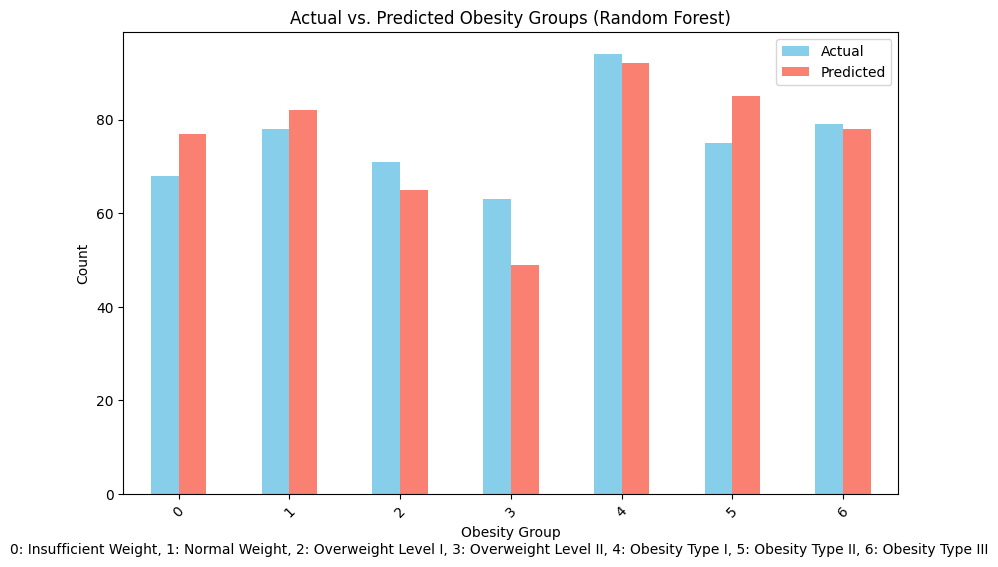

In [599]:
actual_counts_dt = pd.Series(y_test).value_counts().sort_index()
predicted_counts_dt = pd.Series(y_pred).value_counts().sort_index()
comparison_dt = pd.DataFrame({'Actual': actual_counts_dt, 'Predicted': predicted_counts_dt}).fillna(0)

# Get actual vs predicted counts for Random Forest
actual_counts_rf = pd.Series(y_test).value_counts().sort_index()
predicted_counts_rf = pd.Series(y_pred_rf).value_counts().sort_index()
comparison_rf = pd.DataFrame({'Actual': actual_counts_rf, 'Predicted': predicted_counts_rf}).fillna(0)

# Plot for Decision Tree
plt.figure(figsize=(10, 6))
comparison_dt.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel("Obesity Group")
plt.ylabel("Count")
plt.title("Actual vs. Predicted Obesity Groups (Decision Tree)")
plt.figtext(0.99, 0.01, "0: Insufficient Weight, 1: Normal Weight, 2: Overweight Level I, 3: Overweight Level II, 4: Obesity Type I, 5: Obesity Type II, 6: Obesity Type III", horizontalalignment='right')
plt.xticks(rotation=45)
plt.legend(["Actual", "Predicted"])
plt.show()

# Plot for Random Forest
plt.figure(figsize=(10, 6))
comparison_rf.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel("Obesity Group")
plt.ylabel("Count")
plt.title("Actual vs. Predicted Obesity Groups (Random Forest)")
plt.figtext(0.99, 0.01, "0: Insufficient Weight, 1: Normal Weight, 2: Overweight Level I, 3: Overweight Level II, 4: Obesity Type I, 5: Obesity Type II, 6: Obesity Type III", horizontalalignment='right')
plt.xticks(rotation=45)
plt.legend(["Actual", "Predicted"])
plt.show()

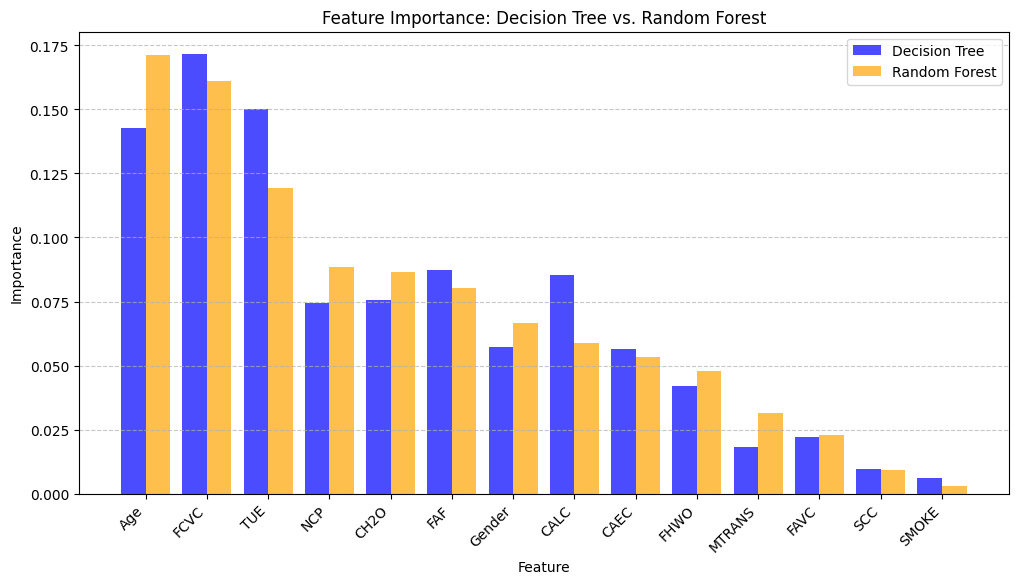

In [600]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Decision Tree Feature Importance
dt_importances = clf.feature_importances_
rf_importances = rf_clf.feature_importances_
feature_names = X.columns

# Create a DataFrame for both models
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Decision Tree': dt_importances,
    'Random Forest': rf_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Random Forest', ascending=False)

x = np.arange(len(feature_importance_df))
width = 0.4

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, feature_importance_df['Decision Tree'], width=width, label="Decision Tree", color='blue', alpha=0.7)
plt.bar(x + width/2, feature_importance_df['Random Forest'], width=width, label="Random Forest", color='orange', alpha=0.7)

plt.xticks(ticks=x, labels=feature_importance_df['Feature'], rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance: Decision Tree vs. Random Forest")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Comparison of Feature Importance between Male and Female Models

In [601]:
male_df = df[df['Gender'] == 1]
female_df = df[df['Gender'] == 0]

X_male = male_df.drop(['NObeyesdad', 'Weight', 'Height', 'Gender'], axis=1)
y_male = male_df['NObeyesdad']

X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_male, y_male, test_size=0.25, random_state=42)

male_clf = RandomForestClassifier(n_estimators=100, random_state=42)
male_clf.fit(X_male_train, y_male_train)

y_male_pred = male_clf.predict(X_male_test)
male_accuracy = accuracy_score(y_male_test, y_male_pred)
male_recall = recall_score(y_male_test, y_male_pred, average='weighted')

print(f"Male Model - Accuracy:, {male_accuracy:.3f}")
print(f"Male Model - Recall:, {male_recall:.3f}")

male_importances = male_clf.feature_importances_
male_feature_importances = pd.DataFrame({'Feature': X_male.columns, 'Importance': male_importances})
male_feature_importances = male_feature_importances.sort_values(by='Importance', ascending=False)

X_female = female_df.drop(['NObeyesdad', 'Weight', 'Height', 'Gender'], axis=1)
y_female = female_df['NObeyesdad']

X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_female, y_female, test_size=0.25, random_state=42)

female_clf = RandomForestClassifier(n_estimators=100, random_state=42)
female_clf.fit(X_female_train, y_female_train)

y_female_pred = female_clf.predict(X_female_test)
female_accuracy = accuracy_score(y_female_test, y_female_pred)
female_recall = recall_score(y_female_test, y_female_pred, average='weighted')

print(f"Female Model - Accuracy:, {female_recall:.3f}")
print(f"Female Model - Recall:, {female_recall:.3f}")

Male Model - Accuracy:, 0.831
Male Model - Recall:, 0.831
Female Model - Accuracy:, 0.881
Female Model - Recall:, 0.881


### Visualization of Feature Importance Comparison between Male and Female

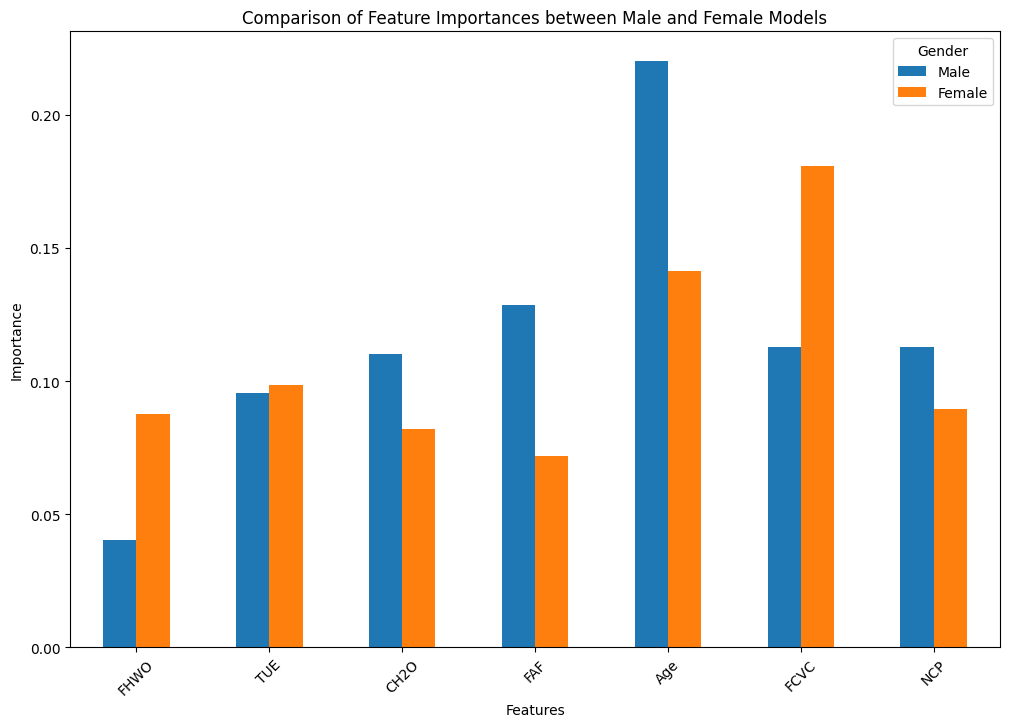

In [602]:
female_importances = female_clf.feature_importances_
female_feature_importances = pd.DataFrame({'Feature': X_female.columns, 'Importance': female_importances})
female_feature_importances = female_feature_importances.sort_values(by='Importance', ascending=False)

top_male = male_feature_importances.head(5)['Feature'].tolist()
top_female = female_feature_importances.head(5)['Feature'].tolist()
all_top = list(set(top_male + top_female))

comparison = pd.DataFrame(index=all_top, columns=['Male', 'Female'])
for feature in all_top:
    if feature in male_feature_importances['Feature'].values:
        comparison.loc[feature, 'Male'] = male_feature_importances[male_feature_importances['Feature'] == feature]['Importance'].values[0]
    else:
        comparison.loc[feature, 'Male'] = 0
    if feature in female_feature_importances['Feature'].values:
        comparison.loc[feature, 'Female'] = female_feature_importances[female_feature_importances['Feature'] == feature]['Importance'].values[0]
    else:
        comparison.loc[feature, 'Female'] = 0
        
comparison.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Feature Importances between Male and Female Models')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

## 4.3 Logistic Regression for Family History Overweight Prediction
Weight, height and age are excluded from the features because we want to predict the probability of a family member having suffered or suffering from overweight based on lifestyle choices.

In [603]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score

df.drop('NObeyesdad', axis=1, inplace=True)

y = df['FHWO']
X = df.drop(['FHWO', "Weight", "Height", 'Age'], axis=1)

X = X.astype(float)

In [604]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
reg = LogisticRegression()
reg.fit(X, y)
y_pred = cross_val_predict(estimator=reg, X=X, y=y, cv=50)

cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

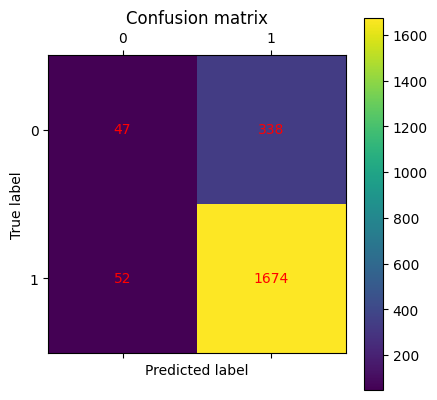

Accuracy: 0.815
Precision: 0.832
Recall: 0.970


In [605]:
# visualize confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# include counts
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print("Accuracy: %0.3f" % accuracy)
print("Precision: %0.3f" % precision)
print("Recall: %0.3f" % recall)

#### Interpretation:
- **True Positive (TP)**: The number of correct predictions that an individual has a family history with overweight is **1674**.
- **True Negative (TN)**: The number of correct predictions that an individual does not have a family history with overweight is **47**.
- **False Positive (FP)**: The number of incorrect predictions that an individual has a family history with overweight is **338**.
- **False Negative (FN)**: The number of incorrect predictions that an individual does not have a family history with overweight is **52**.


#### Accuracy, Precision, and Recall

- **Accuracy**: The ratio of the number of correct predictions to the total number of predictions. The accuracy of the model is **0.82**.
- **Precision**: The ratio of the number of correct positive predictions to the total number of positive predictions. The precision of the model is **0.83**.
- **Recall**: The ratio of the number of correct positive predictions to the total number of actual positive instances. The recall of the model is **0.97**.

### Permutation Importance

The permutation importance shows the importance of each feature in predicting whether a family member suffers or has suffered from overweight.


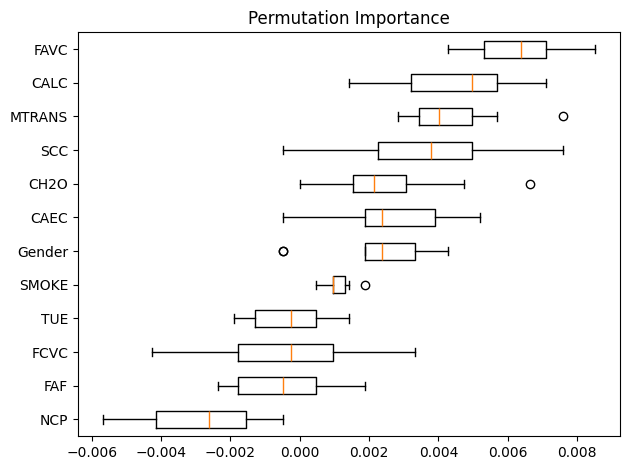

In [606]:
# feature importance
from sklearn.inspection import permutation_importance

result = permutation_importance(reg, X, y, n_repeats=10, scoring="accuracy", random_state=0, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()

#### The top most important features are:
- **FAVC** (Do you eat high caloric food frequently)
- **CALC** (How often do you drink alcohol)
- **MTRANS** (Which transportation do you usually use)

#### The least important features are:
- **FCVC** (Do you usually eat vegetables in your meals)
- **FAF** (How often do you have physical activity)
- **NCP** (How many main meals do you have daily)

From these results, we can conclude that high caloric food consumption and frequency of alcohol consumption indicate a higher probability of overweight in family members. We can also see that physical activity, main meal frequency, and vegetable consumption are less important in determining the probability of overweight in family members.

#### Associate rule mining to find the most common patterns in the data.

In [607]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

df2 = pd.read_csv('datasets/ObesityDataSet_raw_and_data_sinthetic.csv')

df2.drop(['Age', 'Weight', 'Height', 'NCP', 'FCVC', 'FAF', 'TUE', 'CH2O', 'SMOKE', 'family_history_with_overweight'], axis=1, inplace=True)

df_encoded = pd.get_dummies(df2)

frequent_itemsets = apriori(df_encoded, min_support=0.65, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.65)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(FAVC_yes),(CAEC_Sometimes),0.883941,0.836097,0.761724,0.861736,1.030666,1.0,0.022664,1.185441,0.256366,0.794859,0.156432,0.886392
1,(CAEC_Sometimes),(FAVC_yes),0.836097,0.883941,0.761724,0.911048,1.030666,1.0,0.022664,1.304737,0.181531,0.794859,0.233562,0.886392
2,(SCC_no),(FAVC_yes),0.954524,0.883941,0.856466,0.897270,1.015079,1.0,0.012723,1.129751,0.326662,0.872166,0.114849,0.933094
3,(FAVC_yes),(SCC_no),0.883941,0.954524,0.856466,0.968917,1.015079,1.0,0.012723,1.463075,0.127998,0.872166,0.316508,0.933094
4,(FAVC_yes),(MTRANS_Public_Transportation),0.883941,0.748460,0.665561,0.752947,1.005995,1.0,0.003966,1.018162,0.051347,0.688388,0.017838,0.821094
5,(MTRANS_Public_Transportation),(FAVC_yes),0.748460,0.883941,0.665561,0.889241,1.005995,1.0,0.003966,1.047845,0.023691,0.688388,0.045660,0.821094
6,(SCC_no),(CAEC_Sometimes),0.954524,0.836097,0.810516,0.849132,1.015590,1.0,0.012442,1.086399,0.337558,0.826970,0.079528,0.909268
7,(CAEC_Sometimes),(SCC_no),0.836097,0.954524,0.810516,0.969405,1.015590,1.0,0.012442,1.486394,0.093658,0.826970,0.327231,0.909268
8,(SCC_no),(MTRANS_Public_Transportation),0.954524,0.748460,0.713406,0.747395,0.998576,1.0,-0.001017,0.995780,-0.030407,0.720919,-0.004238,0.850280
9,(MTRANS_Public_Transportation),(SCC_no),0.748460,0.954524,0.713406,0.953165,0.998576,1.0,-0.001017,0.970976,-0.005638,0.720919,-0.029892,0.850280


# 5. Evaluation
Mainly three different metrics are used to evaluate the models: accuracy, recall, and precision. The confusion matrix is also used to visualize the performance of the logistic regression model.

### Model Performance Comparison

| Model                     | Accuracy | Recall | Precision |
|---------------------------|----------|--------|-----------|
| Decision Tree Classifier  | 0.718    | 0.718  | 0.732     |
| Random Forest Classifier  | 0.812    | 0.812  | 0.815     |
| Logistic Regression       | 0.815    | 0.970  | 0.832     |

Association rule mining: the highest support: 0.86, confidence: 0.97 (FAVC_yes and CAEC_Sometimes)
 
The Decision Tree Classifier achieved an accuracy of 71.78%, with similar recall and precision values. This suggests that the model makes balanced predictions, but it may not always generalize well to new data.

The Random Forest Classifier performed better, with 81.25% accuracy, meaning it made correct predictions more often. Since random forests combine multiple decision trees, they tend to handle variability in the data better and reduce overfitting.

The Logistic Regression model had the highest accuracy 82.57% and a very high recall 96.70%. This means it was excellent at identifying positive cases, but since its precision was slightly lower 84.29%, it also had a higher number of false positives.

# 6. Deployment
Accurately predicting an individual's weight category based on lifestyle choices enables medical professionals to provide tailored interventions, including customized diet plans, exercise routines, and lifestyle adjustments. 

Gender-based obesity factor analysis allows professionals to develop personalized weight loss programs tailored to specific needs.

Analyzing family history offers insights into recurring overweight patterns, aiding in early risk identification and prevention.

Association rule mining uncovers behavioral links, revealing how one unhealthy habit may trigger another, further refining weight management strategies.